## SVM Model

### Library and Data Importation

In [2]:
#import sys
#!{sys.executable} -m pip install cvxpy
import cvxpy as cp
import pandas as pd
import numpy as np
from numpy import array
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#import data set
nfl1 = pd.read_csv("NFL_data_super_cleaned.csv")

nfl1.dropna(inplace=True)
display(nfl1)
print(nfl1.isnull().values.any(), nfl1.isnull().sum().sum())

,posteam,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_margin
0,PIT,58.0,893.0,1,1.0,0.0,10,pass,0.0
1,PIT,53.0,856.0,1,2.0,0.0,5,run,0.0
2,PIT,56.0,815.0,1,3.0,0.0,8,pass,0.0
3,PIT,56.0,807.0,1,4.0,0.0,8,kick,0.0
4,TEN,98.0,796.0,1,1.0,0.0,10,run,0.0
...,...,...,...,...,...,...,...,...,...
353055,CAR,71.0,82.0,4,2.0,0.0,1,pass,-5.0
353056,CAR,71.0,77.0,4,3.0,0.0,1,pass,-5.0
353057,CAR,66.0,63.0,4,2.0,0.0,10,pass,-5.0
353058,CAR,66.0,58.0,4,3.0,0.0,10,pass,-5.0


False 0


### Data Preprocessing

In [5]:
#Our 350,000 samples seem like a little too much, so sample about 10,000 rows
sample = nfl1.sample(n=150000, random_state=21, axis=0)
print(sample.isnull().values.any(), sample.isnull().sum().sum())
display(sample)
#one-hot encode the categorical variables
#posteam_type, defteam, side_of_field, game_date (drop), time (convert?), yrdline (convert?)

cat_columns = ["posteam" , "qtr"]
#one-hot encode categorical variables
encoder = preprocessing.OneHotEncoder()
cat_array = encoder.fit_transform(sample[cat_columns]).toarray()
cat_labels = encoder.get_feature_names_out(cat_columns)
cat_onehot_encoded = pd.DataFrame(cat_array, columns=cat_labels)

#Add back the continuous variables
cat_onehot_encoded["yardline_100"] = sample["yardline_100"]
cat_onehot_encoded["quarter_seconds_remaining"] = sample["quarter_seconds_remaining"]
cat_onehot_encoded["down"] = sample["down"]
cat_onehot_encoded["goal_to_go"] = sample["goal_to_go"]
cat_onehot_encoded["ydstogo"] = sample["ydstogo"]
cat_onehot_encoded["score_margin"] = sample["score_margin"]


cat_onehot_encoded["play_type"] = sample["play_type"]
cat_onehot_encoded.dropna(inplace=True)


display(cat_onehot_encoded)
print(cat_onehot_encoded.isnull().values.any(), cat_onehot_encoded.isnull().sum().sum())
#print(onehot_encoded.isnull().values.any())
#split data into training and testing sets
#seed: 21, train/test ratio: 0.2 test, 0.8 train



x, y = cat_onehot_encoded.drop(["play_type"], axis=1).to_numpy(), cat_onehot_encoded["play_type"].to_numpy()
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 21)



False 0


,posteam,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_margin
222356,SEA,61.0,119.0,1,3.0,0.0,22,run,0.0
61840,CAR,78.0,702.0,1,4.0,0.0,4,kick,-7.0
2684,HOU,61.0,585.0,4,2.0,0.0,4,run,0.0
225580,JAX,73.0,483.0,3,3.0,0.0,3,pass,-3.0
46520,NO,70.0,201.0,1,1.0,0.0,10,run,7.0
...,...,...,...,...,...,...,...,...,...
231258,LAR,35.0,51.0,4,1.0,0.0,10,pass,-3.0
111224,KC,13.0,12.0,3,1.0,0.0,10,run,-11.0
139500,SEA,24.0,278.0,2,1.0,0.0,10,run,17.0
26039,DAL,66.0,843.0,4,2.0,0.0,14,pass,-4.0


,posteam_ARI,posteam_ATL,posteam_BAL,posteam_BUF,posteam_CAR,posteam_CHI,posteam_CIN,posteam_CLE,posteam_DAL,posteam_DEN,...,qtr_3,qtr_4,qtr_5,yardline_100,quarter_seconds_remaining,down,goal_to_go,ydstogo,score_margin,play_type
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,53.0,856.0,2.0,0.0,5.0,0.0,run
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,56.0,815.0,3.0,0.0,8.0,0.0,pass
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,98.0,760.0,2.0,0.0,10.0,0.0,pass
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,94.0,731.0,3.0,0.0,6.0,0.0,run
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,96.0,694.0,4.0,0.0,8.0,0.0,kick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26.0,288.0,2.0,0.0,7.0,-14.0,pass
149988,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,29.0,150.0,4.0,0.0,10.0,-14.0,kick
149989,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,80.0,145.0,1.0,0.0,10.0,11.0,run
149991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,86.0,114.0,3.0,0.0,16.0,11.0,run


False 0


### Multi-class SVM Model Implementation

              precision    recall  f1-score   support

        kick       0.89      0.98      0.93      1183
        pass       0.68      0.73      0.71      6614
         run       0.61      0.53      0.57      4887

    accuracy                           0.68     12684
   macro avg       0.73      0.75      0.73     12684
weighted avg       0.67      0.68      0.67     12684

Confusion matrix, without normalization
[[1173    9    1]
 [4167  211 2236]
 [2254   85 2548]]
Normalized confusion matrix
[[9.92e-01 7.61e-03 8.45e-04]
 [6.30e-01 3.19e-02 3.38e-01]
 [4.61e-01 1.74e-02 5.21e-01]]


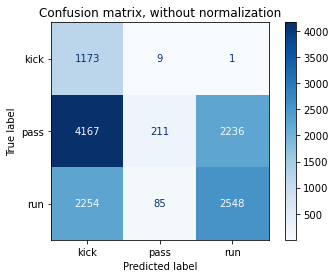

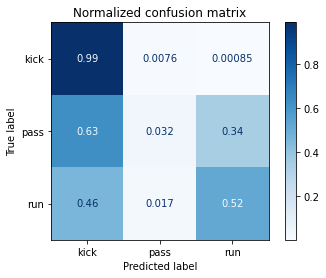

In [6]:
#compares each play_type to the other possible play_type

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

clf_ovo = SVC(kernel='linear', decision_function_shape='ovo') # The other is ovr

clf_ovo.fit(scaler.transform(X_train), np.asarray(y_train))

print(classification_report(y_test, clf_ovo.predict(scaler.transform(X_test))))

#confusion matrix code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.htmlnp.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_ovo,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()